In [1]:
import os
import cv2
import torch
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

device = torch.device('cuda')
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = True

/home/RRAM_HKU/anaconda3/envs/DAC/lib/python3.9/site-packages/tqdm-4.66.2-py3.9.egg/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from nanodet.util import cfg, load_config, Logger
config_path = '/home/RRAM_HKU/nanodet-main/config/my_dataset.yml'
model_path = '/home/RRAM_HKU/nanodet-main/workspace/nanodet_m/model_best/nanodet_model_best.pth'
image_path = '/home/RRAM_HKU/nanodet-main/dataset/valid/imgs/010003.jpg'
load_config(cfg, config_path)
logger = Logger(-1, use_tensorboard=False)

In [3]:
from demo.demo import Predictor
predictor = Predictor(cfg, model_path, logger, device=device)
meta, res = predictor.inference(image_path)

model size is  1.0x
init weights...
=> loading pretrained model https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth
Finish initialize NanoDet-Plus Head.
forward time: 0.524s | decode time: 0.008s | 

/home/RRAM_HKU/anaconda3/envs/DAC/lib/python3.9/site-packages/torch/nn/functional.py:3631: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
/home/RRAM_HKU/anaconda3/envs/DAC/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1639180487213/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


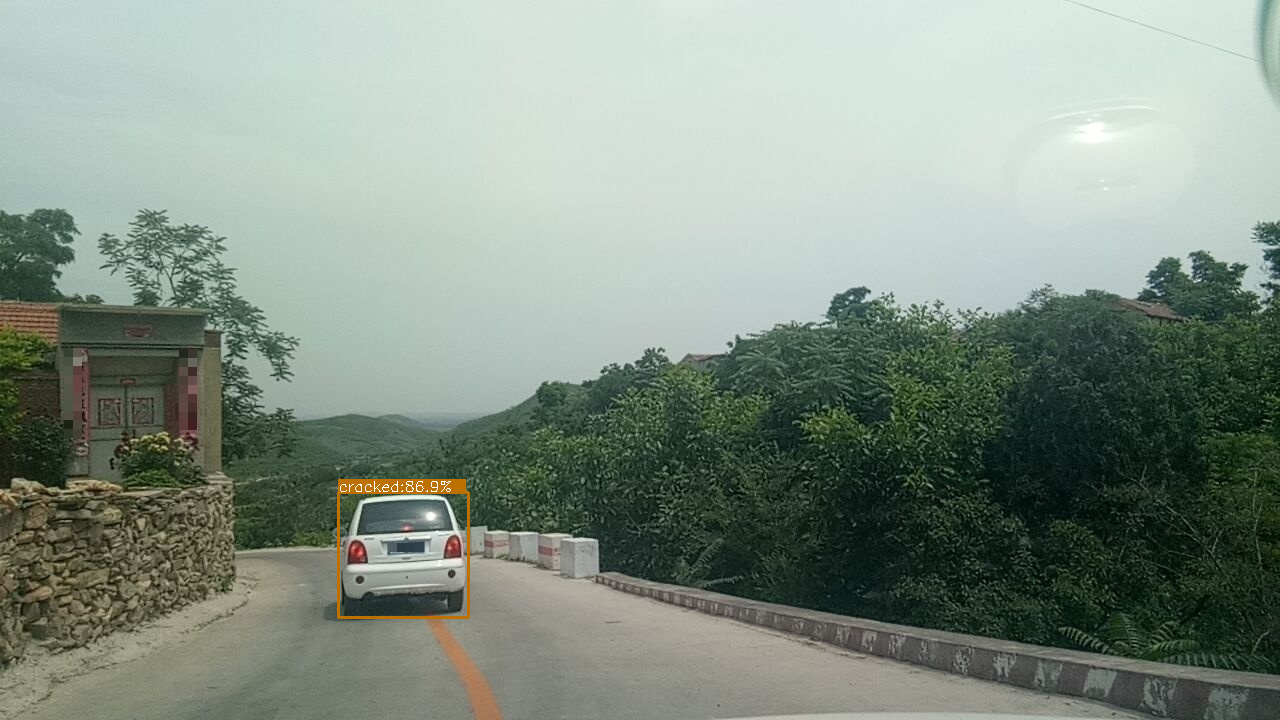

In [4]:
from nanodet.util import overlay_bbox_cv

from IPython.display import display
from PIL import Image

def cv2_imshow(a, convert_bgr_to_rgb=True):
    a = a.clip(0, 255).astype('uint8')
    if convert_bgr_to_rgb and a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(a))
result = overlay_bbox_cv(meta['raw_img'][0], res[0], ['cracked','complete'], score_thresh=0.35)
imshow_scale = 1.0
cv2_imshow(cv2.resize(result, None, fx=imshow_scale, fy=imshow_scale))